## PyEEM - Fluorescence Excitation-Emission Matrix (EEM) Spectroscopy
# Demo #2 - drEEM
## Load the PyEEM library and display version

In [1]:
import pyeem
print(pyeem.__version__)

1.0.8


## Check out the supported instruments

In [2]:
pyeem.instruments.supported

name
manufacturer supported_models              
Agilent      Cary 4E                cary_4e
             Cary Eclipse      cary_eclipse
Horiba       Aqualog-880-C          aqualog
             SPEX Fluorolog-3     fluorolog

## Check out the demo datasets

In [3]:
demos_df = pyeem.datasets.demos
display(demos_df)

print("Dataset description for the drEEM demo:")
print(demos_df[demos_df["demo_name"] == "drEEM"]["description"].item())

,demo_name,description,citation,DOI,absorbance_instrument,water_raman_instrument,EEM_instrument
0,rutherford,Excitation Emission Matrix (EEM) fluorescence ...,"Rutherford, Jay W., et al. ""Excitation emissio...",10.1016/j.atmosenv.2019.117065,Aqualog,None,Aqualog
1,drEEM,The demo dataset contains measurements made du...,"Murphy, Kathleen R., et al. ""Fluorescence spec...",10.1039/c3ay41160e,Cary 4E,Fluorolog,Fluorolog


Dataset description for the drEEM demo:
The demo dataset contains measurements made during four surveys of San Francisco Bay that took place in spring, summer, autumn and winter 2006 (Murphy et al. 2013, J. Mar. Syst. 111-112, 157-166).


## Download the drEEM demo dataset from S3
- Please note that this step requires an internet connection because the data is downloaded from an AWS S3 bucket.

In [4]:
demo_data_dir = pyeem.datasets.download_demo(
    "demo_data", demo_name="drEEM"
)

Download Demo Dataset from S3: 185it [00:00, 305.05it/s]


## Load the dataset

In [5]:
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument="fluorolog",
    absorbance_instrument="cary_4e",
    eem_instrument="fluorolog",
    mode="w"
)

## Let's checkout the metadata
- The metadata contains information about collected sample sets which are composed of a few different scan types.

In [6]:
display(dataset.meta_df.head())

datetime_utc          filename collected_by  \
sample_set scan_type                                                        
1          water_raman 2020-06-30 19:44:20  water_raman1.csv         Anon   
           blank_eem   2020-06-30 19:44:21    blank_eem1.csv         Anon   
           sample_eem  2020-06-30 19:44:22   sample_eem1.csv         Anon   
           sample_eem  2020-06-30 19:44:23   sample_eem3.csv         Anon   
           absorb      2020-06-30 19:44:24       absorb1.csv         Anon   

                       description comments  dilution original_date  \
sample_set scan_type                                                  
1          water_raman                            1.0    2006-05-01   
           blank_eem                              1.0    2006-05-01   
           sample_eem                             1.0    2006-05-01   
           sample_eem                             1.0    2006-05-01   
           absorb                                 1.0    2006-05-01   

                                                                 filepath  \
sample_set scan_type                                                        
1          water_raman  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           blank_eem    /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem   /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem   /home/roboat/Documents/roboat/PyEEM/examples/d...   
           absorb       /home/roboat/Documents/roboat/PyEEM/examples/d...   

                                name                        hdf_path  
sample_set scan_type                                                  
1          water_raman  water_raman1  raw_sample_sets/1/water_raman1  
           blank_eem      blank_eem1    raw_sample_sets/1/blank_eem1  
           sample_eem    sample_eem1   raw_sample_sets/1/sample_eem1  
           sample_eem    sample_eem3   raw_sample_sets/1/sample_eem3  
           absorb            absorb1       raw_sample_sets/1/absorb1

## Checkout the metadata summary information

In [7]:
dataset.metadata_summary_info()

,Date Range,Number of Sample Sets,Number of blank EEMs,Number of sample EEMs,Number of water raman scans,Number of absorbance scans
0,"(Timestamp('2020-06-30 19:44:20'), Timestamp('...",16,16,73,16,77


## Create a preprocessing routine
- The demo dataset contains raw scans, in order to analyze and interpret this data, we must first apply several preprocessing steps.

In [8]:
routine_df = pyeem.preprocessing.create_routine(
    crop = False,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = True,
    raman_normalization = True,
    scatter_removal = True,
    dilution = True,
)

display(routine_df)

,step_name,hdf_path
step_order,,
0,raw,raw_sample_sets/
1,blank_subtraction,preprocessing/corrections/blank_subtraction
2,inner_filter_effect,preprocessing/corrections/inner_filter_effect
3,raman_normalization,preprocessing/corrections/raman_normalization
4,scatter_removal,preprocessing/corrections/scatter_removal
5,dilution,preprocessing/corrections/dilution
6,complete,preprocessing/complete/


## Execute the preprocessing routine
- Each preprocessing step has certain knobs and dials you can tune to have them run to your liking. It is worth checking the documentation to learn more about these customizations.
- Please note that depending on the steps and settings you've chosen as well as your dataset's size, the time it takes for this step to complete will vary.

In [9]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = "interp",
    progress_bar=True
)

display(routine_results_df)

Preprocessing scan sets: 100%|██████████| 16/16 [00:24<00:00,  1.51s/it]


step_completed  \
sample_set scan_type  name        step_name                            
1          blank_eem  blank_eem1  raw                           True   
           sample_eem sample_eem1 raw                           True   
                                  blank_subtraction             True   
                                  inner_filter_effect           True   
                                  raman_normalization          False   
...                                                              ...   
16         sample_eem sample_eem3 inner_filter_effect           True   
                                  raman_normalization          False   
                                  scatter_removal               True   
                                  dilution                     False   
                                  complete                      True   

                                                                               step_exception  \
sample_set scan_type  name        step_name                                                     
1          blank_eem  blank_eem1  raw                                                    None   
           sample_eem sample_eem1 raw                                                    None   
                                  blank_subtraction                                      None   
                                  inner_filter_effect                                    None   
                                  raman_normalization  'NoneType' object is not subscriptable   
...                                                                                       ...   
16         sample_eem sample_eem3 inner_filter_effect                                    None   
                                  raman_normalization  'NoneType' object is not subscriptable   
                                  scatter_removal                                        None   
                                  dilution                                  'dilution_factor'   
                                  complete                                               None   

                                                                                                hdf_path  \
sample_set scan_type  name        step_name                                                                
1          blank_eem  blank_eem1  raw                                       raw_sample_sets/1/blank_eem1   
           sample_eem sample_eem1 raw                                      raw_sample_sets/1/sample_eem1   
                                  blank_subtraction    preprocessing/corrections/blank_subtraction/1/...   
                                  inner_filter_effect  preprocessing/corrections/inner_filter_effect/...   
                                  raman_normalization                                               None   
...                                                                                                  ...   
16         sample_eem sample_eem3 inner_filter_effect  preprocessing/corrections/inner_filter_effect/...   
                                  raman_normalization                                               None   
                                  scatter_removal      preprocessing/corrections/scatter_removal/16/s...   
                                  dilution                                                          None   
                                  complete                         preprocessing/complete/16/sample_eem3   

                                                               units  
sample_set scan_type  name        step_name                           
1          blank_eem  blank_eem1  raw                  Intensity, AU  
           sample_eem sample_eem1 raw                  Intensity, AU  
                                  blank_subtraction    Intensity, AU  
                                  inner_filter_effect  Intensity, AU  
                        

## Check to see if any of the steps failed to complete
- If you are using a demo dataset, you should see an empty dataframe.

In [10]:
display(routine_results_df[routine_results_df["step_exception"].notna()])

step_completed  \
sample_set scan_type  name        step_name                            
1          sample_eem sample_eem1 raman_normalization          False   
                                  dilution                     False   
                      sample_eem3 inner_filter_effect          False   
                                  raman_normalization          False   
                                  dilution                     False   
...                                                              ...   
16         sample_eem sample_eem1 dilution                     False   
                      sample_eem2 raman_normalization          False   
                                  dilution                     False   
                      sample_eem3 raman_normalization          False   
                                  dilution                     False   

                                                                                          step_exception  \
sample_set scan_type  name        step_name                                                                
1          sample_eem sample_eem1 raman_normalization             'NoneType' object is not subscriptable   
                                  dilution                                             'dilution_factor'   
                      sample_eem3 inner_filter_effect  Buffer dtype mismatch, expected 'float64_t' bu...   
                                  raman_normalization             'NoneType' object is not subscriptable   
                                  dilution                                             'dilution_factor'   
...                                                                                                  ...   
16         sample_eem sample_eem1 dilution                                             'dilution_factor'   
                      sample_eem2 raman_normalization             'NoneType' object is not subscriptable   
                                  dilution                                             'dilution_factor'   
                      sample_eem3 raman_normalization             'NoneType' object is not subscriptable   
                                  dilution                                             'dilution_factor'   

                                                      hdf_path units  
sample_set scan_type  name        step_name                           
1          sample_eem sample_eem1 raman_normalization     None  None  
                                  dilution                None  None  
                      sample_eem3 inner_filter_effect     None  None  
                                  raman_normalization     None  None  
                                  dilution                None  None  
...                                                        ...   ...  
16         sample_eem sample_eem1 dilution                None  None  
                      sample_eem2 raman_normalization     None  None  
                                  dilution                None  None  
                      sample_eem3 raman_normalization     None  None  
                                  dilution                None  None  

[152 rows x 4 columns]

## Visualize the preprocessing steps for a single sample

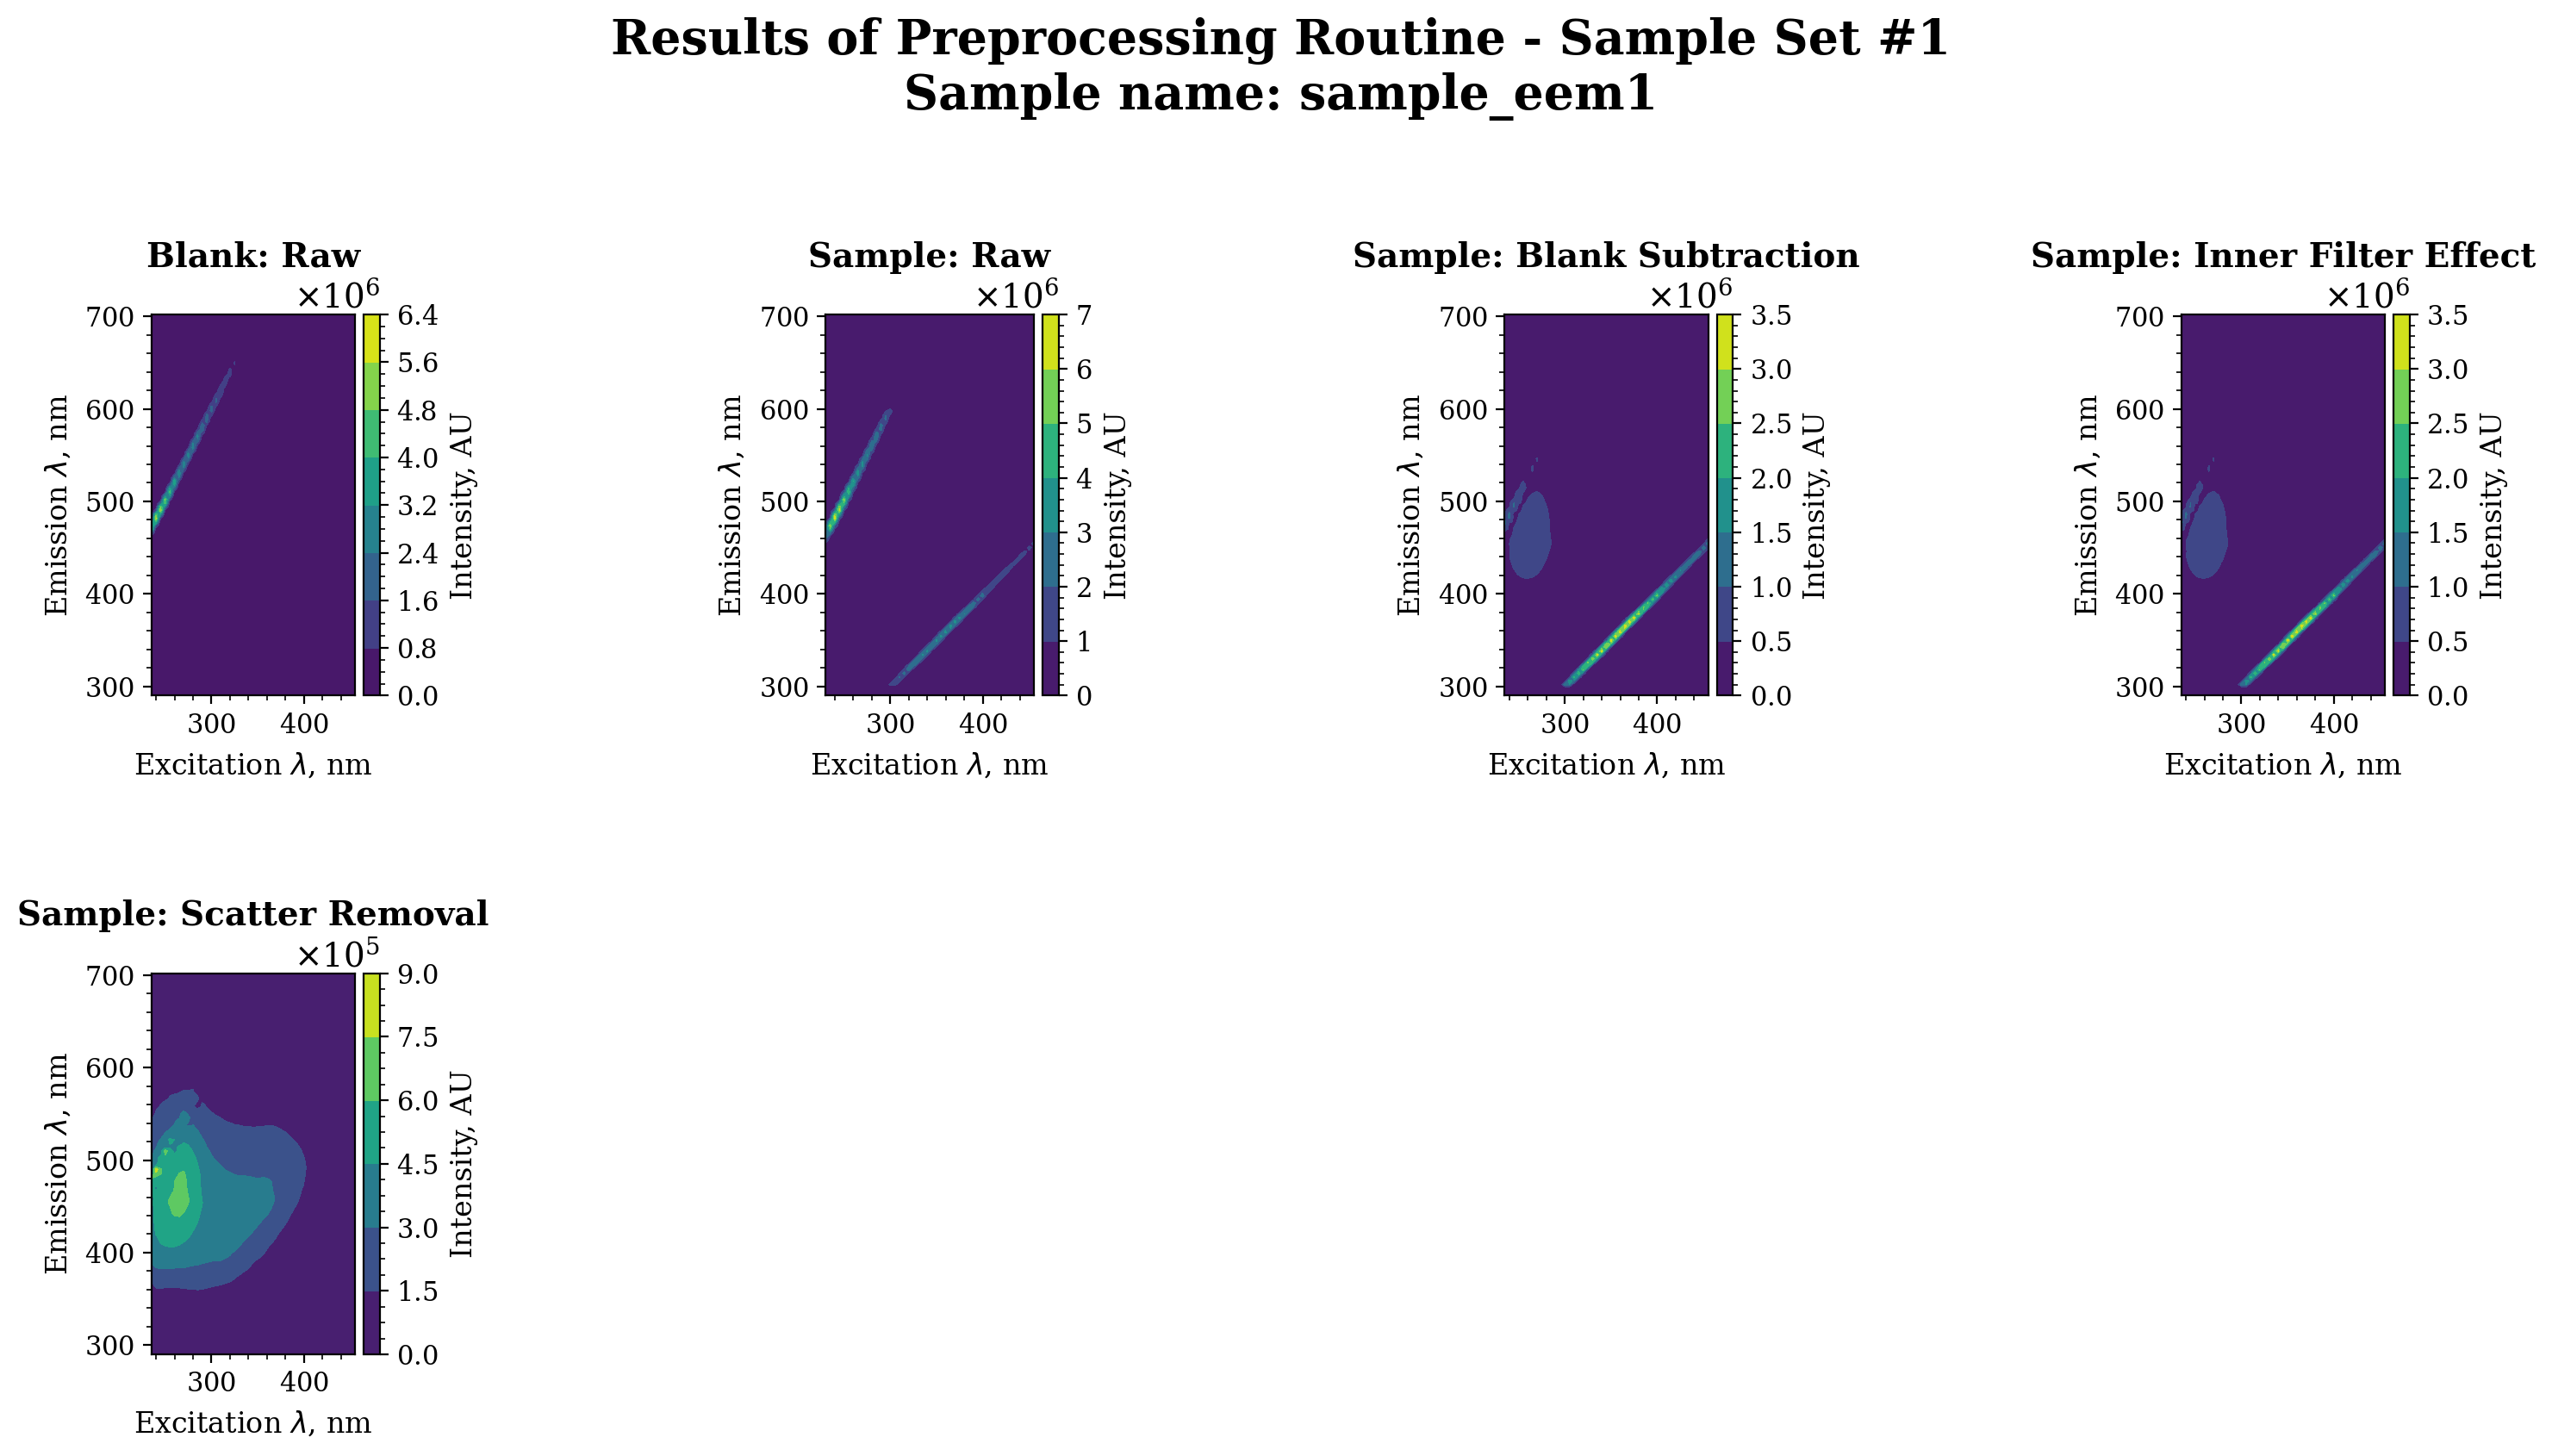

In [11]:
import matplotlib.pyplot as plt

sample_set = 1
sample_name = "sample_eem1"
axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

In [12]:
routine_df = pyeem.preprocessing.create_routine(
    crop = False,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = False,
    raman_normalization = False,
    scatter_removal = True,
    dilution = False,
)

display(routine_df)

,step_name,hdf_path
step_order,,
0,raw,raw_sample_sets/
1,blank_subtraction,preprocessing/corrections/blank_subtraction
2,scatter_removal,preprocessing/corrections/scatter_removal
3,complete,preprocessing/complete/


Preprocessing scan sets: 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]


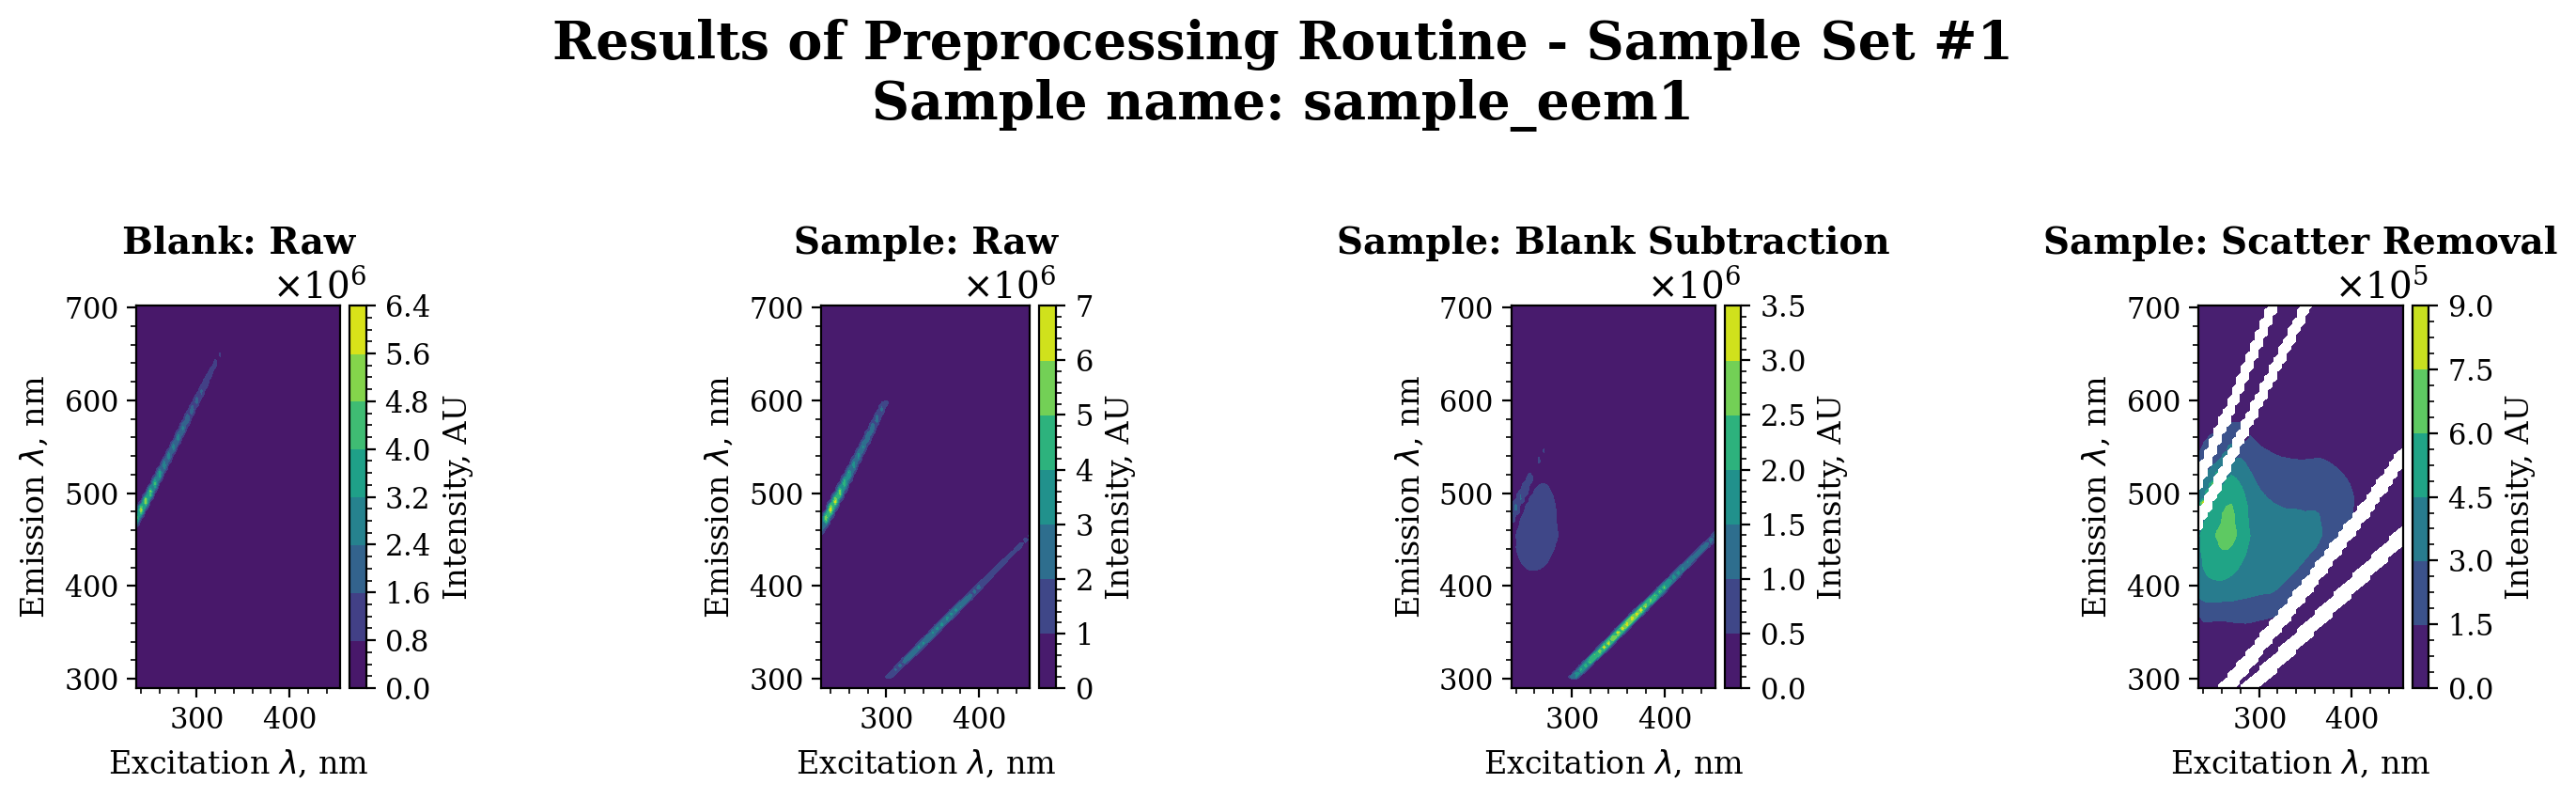

In [13]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    fill = None,
    progress_bar=True
)

axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

Preprocessing scan sets: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]


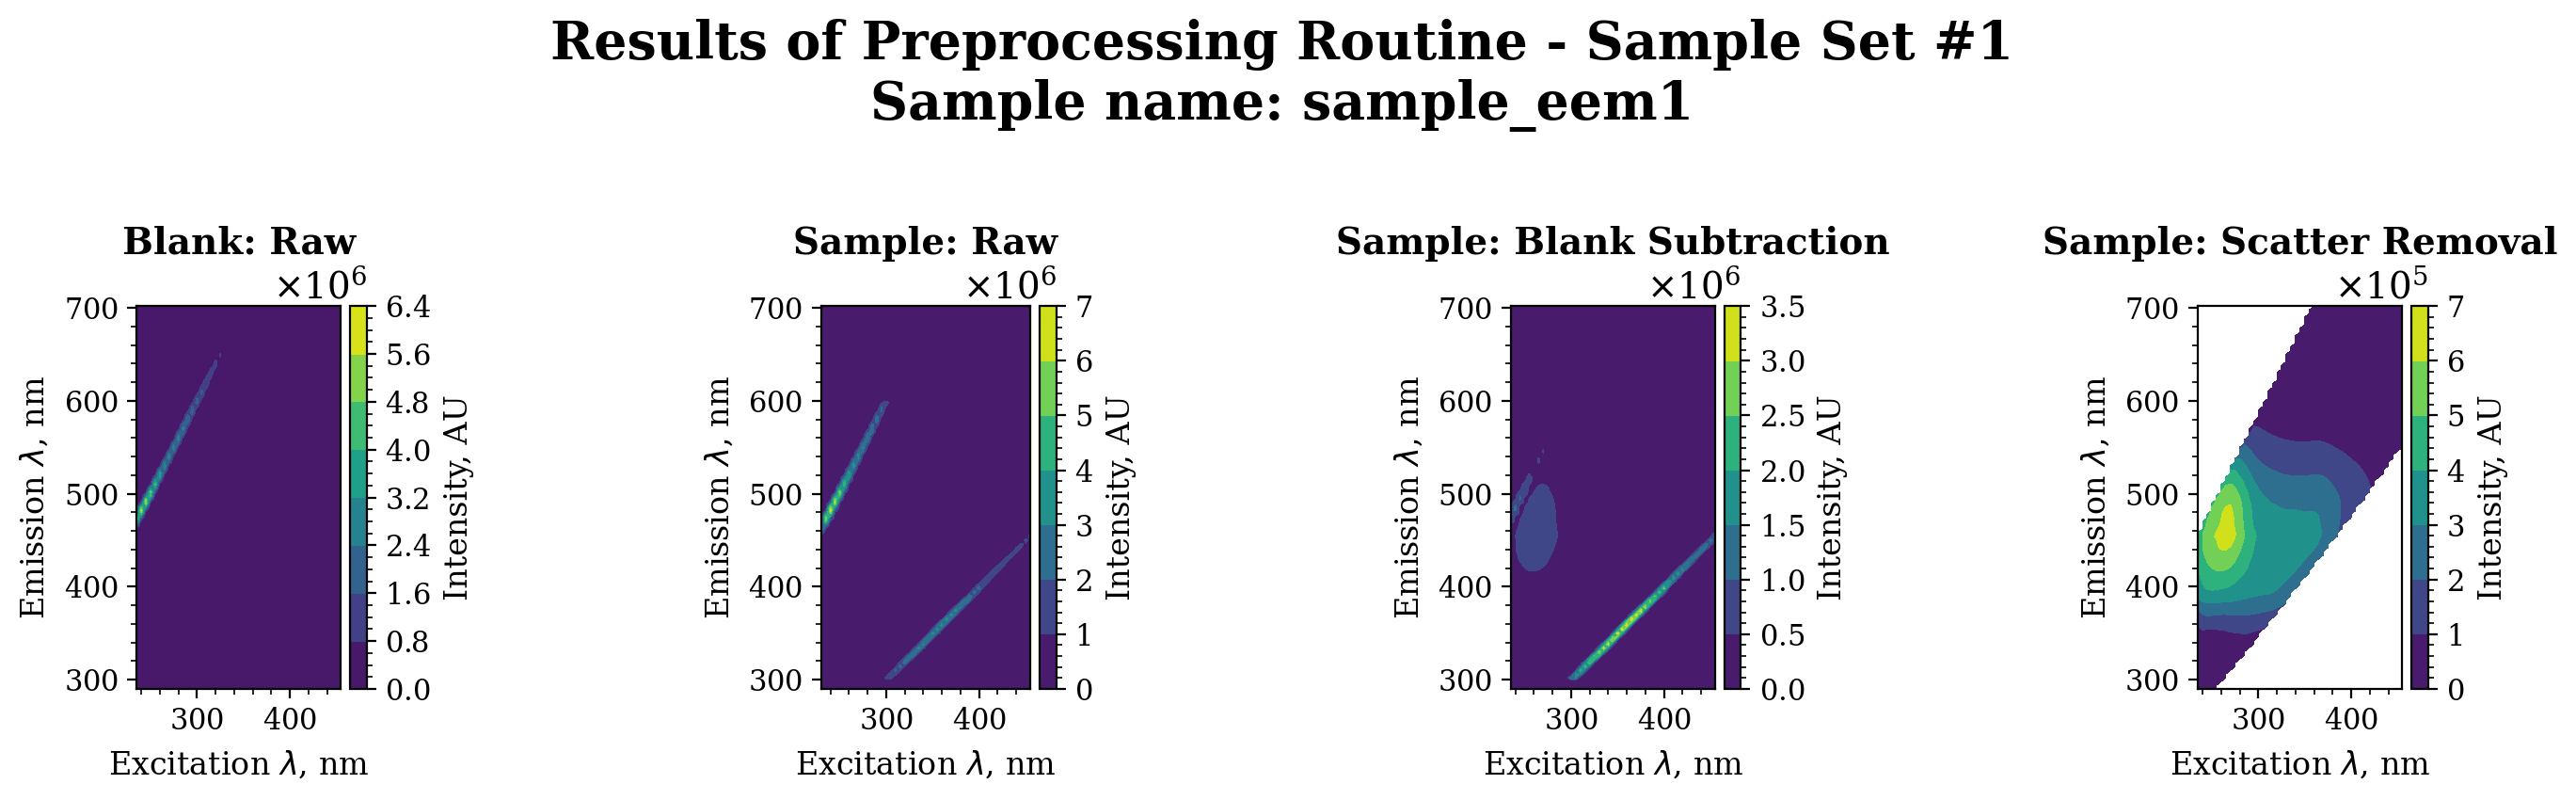

In [14]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = None,
    truncate = "both",
    progress_bar=True
)

axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

Preprocessing scan sets: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]


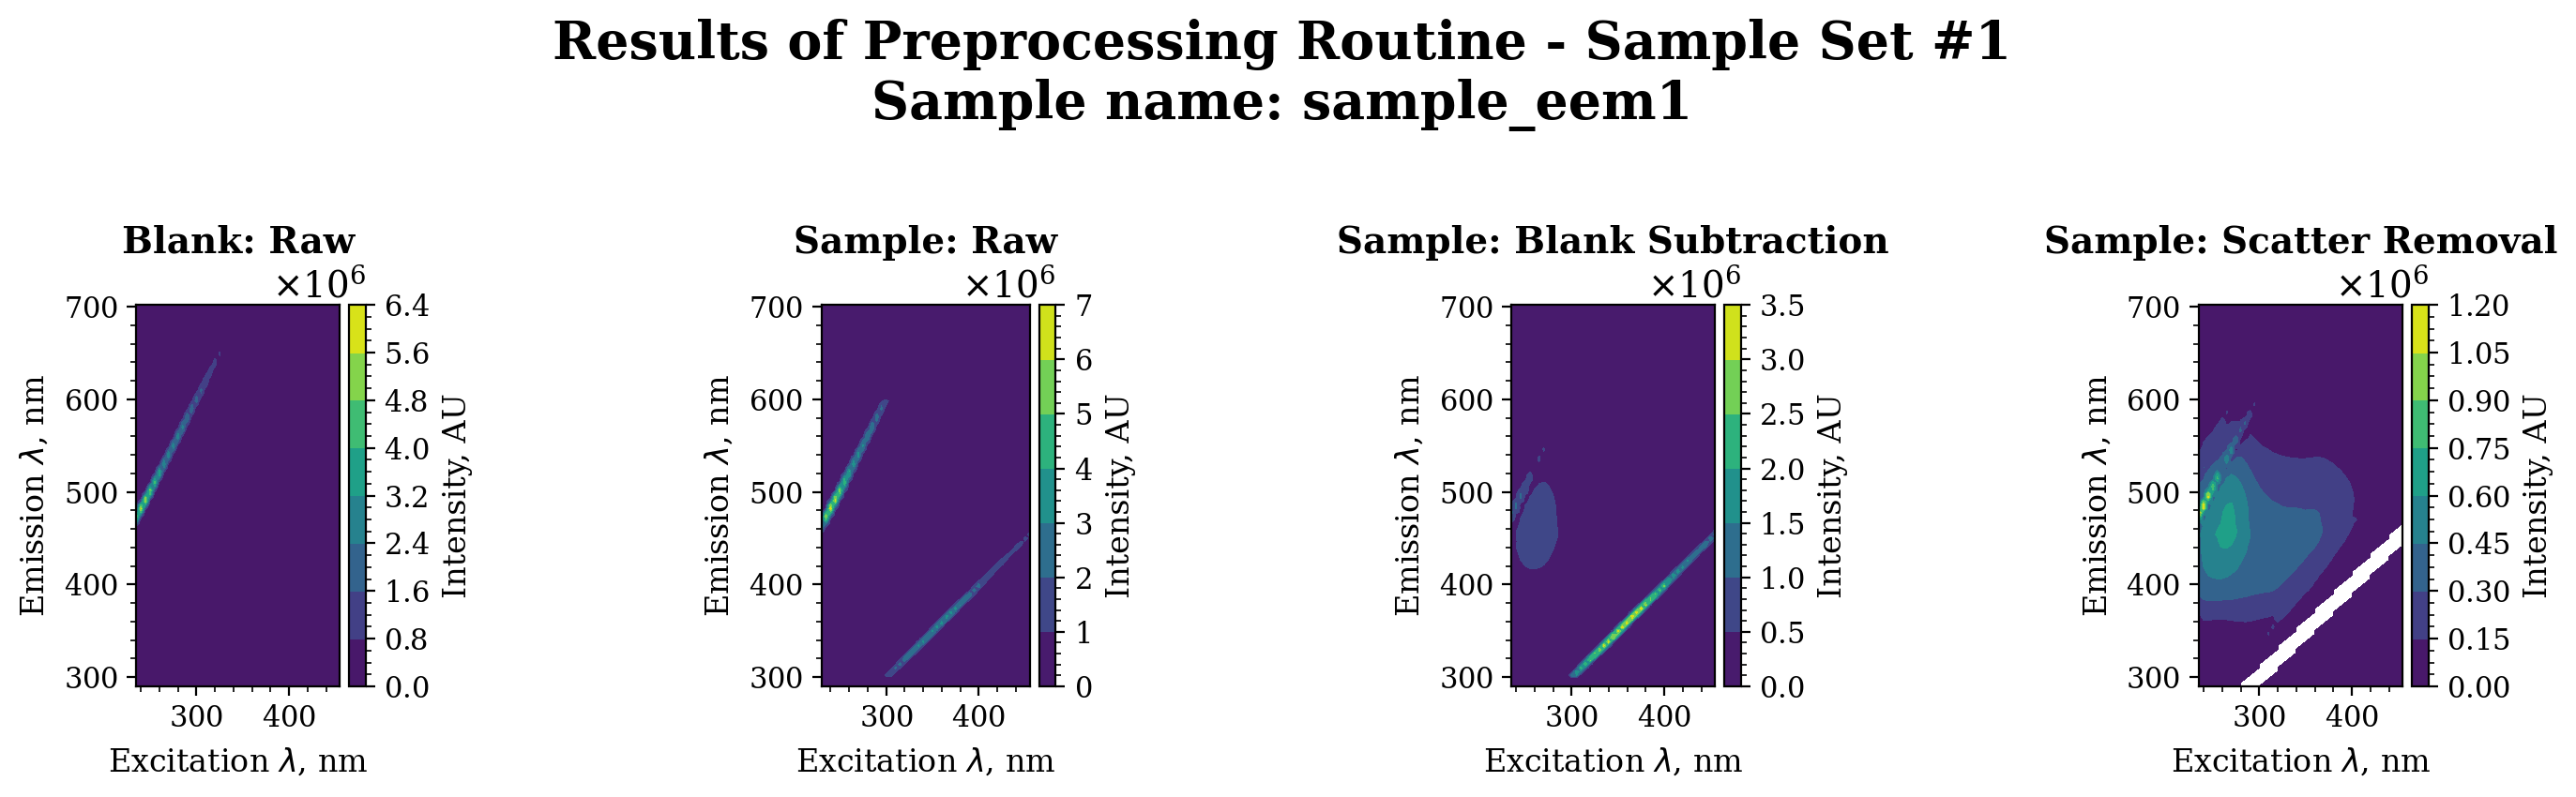

In [15]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = None,
    band="raleigh",
    order="first",
    excision_width=20,
    progress_bar=True
)

axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

Preprocessing scan sets: 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]


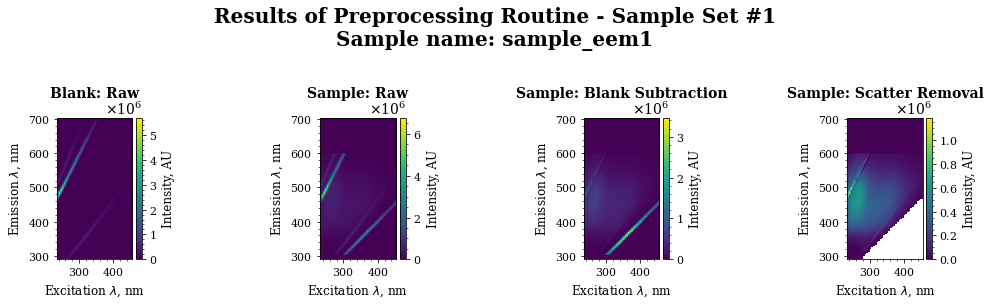

In [16]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = None,
    band="raleigh",
    order="first",
    truncate="below",
    progress_bar=True
)

axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="imshow",
)
plt.show()

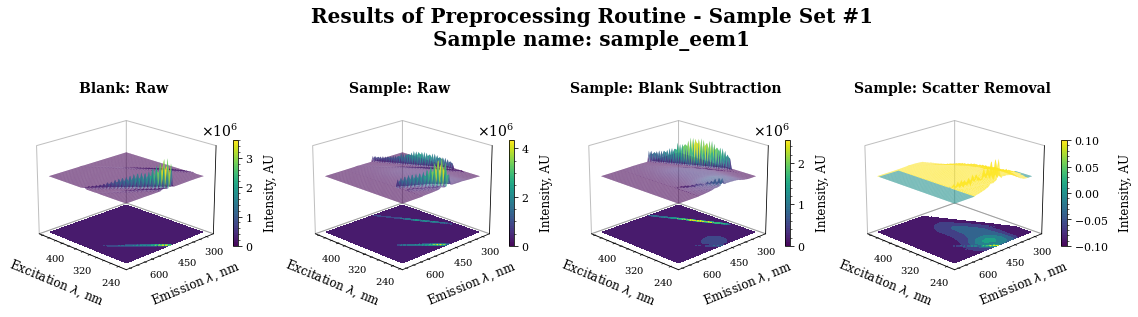

In [17]:
#surface_plot_kws={"rstride":100, "cstride":100}
axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="surface_contour",
)
plt.show()